In [1]:
import pandas as pd

# 데이터 파일 경로
train_file = "kddtrain+.txt"
test_file = "kddtest+.txt"

# 컬럼 이름 설정 (NSL-KDD 데이터셋 공식 컬럼 목록)
columns = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "logged_in",
    "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations",
    "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login", "is_guest_login",
    "count", "srv_count", "serror_rate", "srv_serror_rate", "rerror_rate", "srv_rerror_rate",
    "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate", "dst_host_count",
    "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate", "dst_host_srv_serror_rate", "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate", "label"
]

# 데이터 불러오기
df_train = pd.read_csv(train_file, names=columns)
df_test = pd.read_csv(test_file, names=columns)

# 데이터 크기 확인
print("훈련 데이터 크기:", df_train.shape)
print("테스트 데이터 크기:", df_test.shape)

# 데이터 일부 확인
df_train.head()


훈련 데이터 크기: (125973, 42)
테스트 데이터 크기: (22544, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ✅ 1. 필요 없는 컬럼 제거
df_train.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')
df_test.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')

# ✅ 2. 범주형 데이터(Label Encoding) - 훈련 데이터 기준으로 고정
categorical_cols = ['protocol_type', 'service', 'flag']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])  # 훈련 데이터 학습 및 변환
    df_test[col] = df_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  # 훈련 데이터에 없는 값은 -1로 처리
    encoders[col] = le  

# ✅ 3. 공격 여부 변환 (이진 분류)
df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

# ✅ 4. 데이터 정규화 (StandardScaler)
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.drop('label')  # 숫자형 데이터만 선택

scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

# ✅ 데이터 확인
print("전처리 후 훈련 데이터 크기:", df_train.shape)
print("전처리 후 테스트 데이터 크기:", df_test.shape)
df_train.head()


전처리 후 훈련 데이터 크기: (125973, 41)
전처리 후 테스트 데이터 크기: (22544, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,20,9,0.335137,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
0,udp,44,9,-0.233107,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
0,tcp,49,5,-0.472809,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,1
0,tcp,24,9,-0.088951,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
0,tcp,24,9,-0.144267,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ✅ 1. 필요 없는 컬럼 제거
df_train.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')
df_test.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')

# ✅ 2. 범주형 데이터(Label Encoding)
categorical_cols = ['protocol_type', 'service', 'flag']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])  # 훈련 데이터 학습 및 변환
    df_test[col] = df_test[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)  # 훈련 데이터에 없는 값은 -1로 처리
    encoders[col] = le

# ✅ 3. 공격 여부 변환 (이진 분류)
df_train['label'] = df_train['label'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['label'] = df_test['label'].apply(lambda x: 0 if x == 'normal' else 1)

# ✅ 4. 데이터 정규화 (StandardScaler)
numerical_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.drop('label')  # 숫자형 데이터만 선택

scaler = StandardScaler()
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

# ✅ 데이터 확인
print("✅ 전처리 후 훈련 데이터 크기:", df_train.shape)
print("✅ 전처리 후 테스트 데이터 크기:", df_test.shape)
df_train.head()


✅ 전처리 후 훈련 데이터 크기: (125973, 41)
✅ 전처리 후 테스트 데이터 크기: (22544, 41)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,tcp,-0.686785,0.751111,0.335137,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,1
0,udp,0.781428,0.751111,-0.233107,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1
0,tcp,1.087305,-0.736235,-0.472809,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,1
0,tcp,-0.442083,0.751111,-0.088951,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,1
0,tcp,-0.442083,0.751111,-0.144267,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,1


In [5]:
from sklearn.model_selection import train_test_split

# 입력 데이터(X)와 라벨(y) 분리
X_train = df_train.drop(columns=['label'])
y_train = df_train['label']
X_test = df_test.drop(columns=['label'])
y_test = df_test['label']

# 데이터 크기 확인
print("X_train 크기:", X_train.shape)
print("y_train 크기:", y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", y_test.shape)


X_train 크기: (125973, 40)
y_train 크기: (125973,)
X_test 크기: (22544, 40)
y_test 크기: (22544,)


✅ 훈련 데이터 라벨 분포 (%):
label
1    100.0
Name: proportion, dtype: float64

✅ 테스트 데이터 라벨 분포 (%):
label
1    100.0
Name: proportion, dtype: float64


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54984 (\N{HANGUL SYLLABLE HUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, *

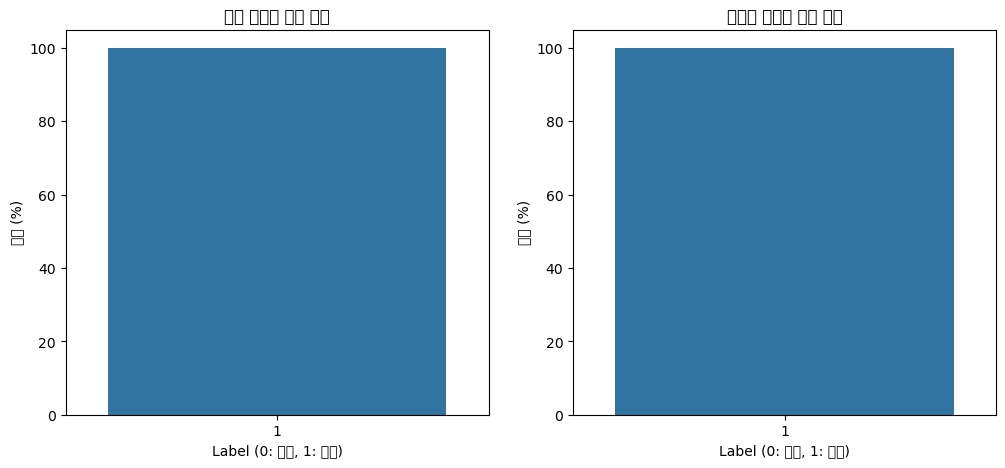

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ 훈련 데이터 분포 확인
train_counts = df_train['label'].value_counts(normalize=True) * 100  # 비율(%) 계산
test_counts = df_test['label'].value_counts(normalize=True) * 100

print("✅ 훈련 데이터 라벨 분포 (%):")
print(train_counts)
print("\n✅ 테스트 데이터 라벨 분포 (%):")
print(test_counts)

# ✅ 시각화 (훈련 데이터 & 테스트 데이터)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=train_counts.index, y=train_counts.values, ax=axes[0])
axes[0].set_title("훈련 데이터 라벨 분포")
axes[0].set_xlabel("Label (0: 정상, 1: 공격)")
axes[0].set_ylabel("비율 (%)")

sns.barplot(x=test_counts.index, y=test_counts.values, ax=axes[1])
axes[1].set_title("테스트 데이터 라벨 분포")
axes[1].set_xlabel("Label (0: 정상, 1: 공격)")
axes[1].set_ylabel("비율 (%)")

plt.show()


In [9]:
# ✅ 원본 데이터에서 라벨 값 확인
print("훈련 데이터 라벨 분포:")
print(df_train['label'].value_counts())

print("\n테스트 데이터 라벨 분포:")
print(df_test['label'].value_counts())


훈련 데이터 라벨 분포:
label
1    125973
Name: count, dtype: int64

테스트 데이터 라벨 분포:
label
1    22544
Name: count, dtype: int64


In [11]:
# ✅ 원본 데이터 로드 (처음 불러왔던 데이터)
df_train_raw = pd.read_csv("kddtrain+.txt", names=columns)
df_test_raw = pd.read_csv("kddtest+.txt", names=columns)

# ✅ 원본 데이터에서 라벨 값 확인
print("원본 훈련 데이터 라벨 분포:")
print(df_train_raw['label'].value_counts())

print("\n원본 테스트 데이터 라벨 분포:")
print(df_test_raw['label'].value_counts())


원본 훈련 데이터 라벨 분포:
label
21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: count, dtype: int64

원본 테스트 데이터 라벨 분포:
label
21    10694
18     2967
20     1343
15     1176
17     1168
19      890
14      736
16      681
13      519
12      486
11      461
7       249
10      195
6       157
8       131
0       123
3       116
9       106
5       103
4       101
1        87
2        55
Name: count, dtype: int64


In [13]:
# ✅ 원본 데이터에서 라벨 컬럼 확인 (앞부분 10개만 출력)
print(df_train_raw[['label']].head(10))
print(df_test_raw[['label']].head(10))


   label
0     20
0     15
0     19
0     21
0     21
0     21
0     21
0     21
0     21
0     21
   label
0     21
0     21
2     21
0     15
1     11
0     21
0     21
0     15
0     21
0      7


In [15]:
# 파일의 앞부분 10줄만 확인
with open("kddtrain+.txt", "r") as file:
    for _ in range(10):
        print(file.readline().strip())


0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.00,0.00,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.00,0.00,0.00,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.20,0.00,0.00,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.00,0.00,0.00,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.00,0.00,1.00,1.00,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,166,9,1.00,1.00,0.00,0.00,0.05,0.06,

In [17]:
# ✅ 데이터 다시 로드 (마지막 숫자 컬럼 제거)
df_train_fixed = pd.read_csv("kddtrain+.txt", names=columns, usecols=columns[:-1])  # 마지막 숫자 컬럼 제외
df_test_fixed = pd.read_csv("kddtest+.txt", names=columns, usecols=columns[:-1])

# ✅ 올바른 라벨 분포 확인
print("✅ 수정된 훈련 데이터 라벨 분포:")
print(df_train_fixed['label'].value_counts())

print("\n✅ 수정된 테스트 데이터 라벨 분포:")
print(df_test_fixed['label'].value_counts())


ValueError: Number of passed names did not match number of header fields in the file

In [19]:
# ✅ 실제 파일에서 컬럼 개수 확인
df_check = pd.read_csv("kddtrain+.txt", header=None)
print(f"파일의 실제 컬럼 개수: {df_check.shape[1]}개")


파일의 실제 컬럼 개수: 43개


In [21]:
# ✅ 마지막 숫자 컬럼 제거 후 데이터 다시 로드
df_train_fixed = pd.read_csv("kddtrain+.txt", header=None).iloc[:, :-1]  # 마지막 컬럼 제거
df_test_fixed = pd.read_csv("kddtest+.txt", header=None).iloc[:, :-1]

# ✅ 컬럼 이름 재설정
df_train_fixed.columns = columns  # 기존 컬럼 리스트 적용
df_test_fixed.columns = columns

# ✅ 데이터 크기 확인
print("✅ 수정된 훈련 데이터 크기:", df_train_fixed.shape)
print("✅ 수정된 테스트 데이터 크기:", df_test_fixed.shape)


✅ 수정된 훈련 데이터 크기: (125973, 42)
✅ 수정된 테스트 데이터 크기: (22544, 42)


In [23]:
print("✅ 수정된 라벨 컬럼 값 확인 (앞부분 10개)")
print(df_train_fixed['label'].unique())  # 정상적으로 라벨이 문자열로 나오는지 확인


✅ 수정된 라벨 컬럼 값 확인 (앞부분 10개)
['normal' 'neptune' 'warezclient' 'ipsweep' 'portsweep' 'teardrop' 'nmap'
 'satan' 'smurf' 'pod' 'back' 'guess_passwd' 'ftp_write' 'multihop'
 'rootkit' 'buffer_overflow' 'imap' 'warezmaster' 'phf' 'land'
 'loadmodule' 'spy' 'perl']


In [25]:
# ✅ 정상(normal)과 공격(attack) 분류 다시 적용 (이진 분류 사용) 
df_train_fixed['label'] = df_train_fixed['label'].apply(lambda x: 0 if x.strip().lower() == 'normal' else 1)
df_test_fixed['label'] = df_test_fixed['label'].apply(lambda x: 0 if x.strip().lower() == 'normal' else 1)

# ✅ 변환 후 라벨 분포 확인
print("✅ 변환 후 훈련 데이터 라벨 분포:")
print(df_train_fixed['label'].value_counts())

print("\n✅ 변환 후 테스트 데이터 라벨 분포:")
print(df_test_fixed['label'].value_counts())


✅ 변환 후 훈련 데이터 라벨 분포:
label
0    67343
1    58630
Name: count, dtype: int64

✅ 변환 후 테스트 데이터 라벨 분포:
label
1    12833
0     9711
Name: count, dtype: int64


In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# ✅ 1. 불필요한 칼럼 제거
df_train_fixed.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')
df_test_fixed.drop(columns=['num_outbound_cmds'], inplace=True, errors='ignore')

# ✅ 2. 범주형 데이터 변환 (Label Encoding)
encoders = {}
categorical_cols = ["protocol_type", "service", "flag"]

for col in categorical_cols:
    le = LabelEncoder()
    df_train_fixed[col] = le.fit_transform(df_train_fixed[col])
    df_test_fixed[col] = df_test_fixed[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    encoders[col] = le

# ✅ 3. 수치형 데이터 정규화 (StandardScaler)
numerical_cols = df_train_fixed.select_dtypes(include=['int64', 'float64']).columns.drop("label")

scaler = StandardScaler()
df_train_fixed[numerical_cols] = scaler.fit_transform(df_train_fixed[numerical_cols])
df_test_fixed[numerical_cols] = scaler.transform(df_test_fixed[numerical_cols])

# ✅ 4. 훈련 및 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    df_train_fixed.drop(columns=['label']), df_train_fixed['label'], test_size=0.2, random_state=42
)

# ✅ 데이터 크기 확인
print("🚀 최종 훈련 데이터 크기:", X_train.shape)
print("🚀 최종 테스트 데이터 크기:", X_test.shape)


🚀 최종 훈련 데이터 크기: (100778, 40)
🚀 최종 테스트 데이터 크기: (25195, 40)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import time

# ✅ 비교할 모델 리스트
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression()
}

# ✅ 각 모델 학습 및 평가
results = {}

for name, model in models.items():
    start_time = time.time()
    print(f"\n🚀 모델 학습 시작: {name}")
    
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 예측
    y_pred = model.predict(X_test)
    
    # 성능 평가
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # 결과 저장
    results[name] = {
        "Accuracy": acc,
        "Classification Report": report,
        "Training Time": elapsed_time
    }

    print(f"✅ {name} 정확도: {acc:.4f}")
    print(f"⏱️ 학습 시간: {elapsed_time:.2f}초")
    print(report)

# ✅ 최종 결과 출력
for name, result in results.items():
    print(f"\n📌 {name} 모델 결과:")
    print(f"- 정확도: {result['Accuracy']:.4f}")
    print(f"- 학습 시간: {result['Training Time']:.2f}초")



🚀 모델 학습 시작: Random Forest
✅ Random Forest 정확도: 0.9989
⏱️ 학습 시간: 6.15초
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


🚀 모델 학습 시작: XGBoost
✅ XGBoost 정확도: 0.9981
⏱️ 학습 시간: 0.55초
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13422
           1       1.00      1.00      1.00     11773

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195


🚀 모델 학습 시작: SVM
✅ SVM 정확도: 0.9588
⏱️ 학습 시간: 439.64초
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     13422
           1       0.97      0.94      0.96     11773


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Train 데이터 클래스 개수 확인
print("훈련 데이터 라벨 개수 분포:\n", pd.Series(y_train).value_counts())

# Test 데이터 클래스 개수 확인
print("테스트 데이터 라벨 개수 분포:\n", pd.Series(y_test).value_counts())


훈련 데이터 라벨 개수 분포:
 label
0    53921
1    46857
Name: count, dtype: int64
테스트 데이터 라벨 개수 분포:
 label
0    13422
1    11773
Name: count, dtype: int64


In [36]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix 계산
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[12946   476]
 [  737 11036]]


In [42]:
import pandas as pd

# Confusion Matrix 출력 (DataFrame 변환)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
print("Confusion Matrix:\n", cm_df)

Confusion Matrix:
           Predicted 0  Predicted 1
Actual 0        12946          476
Actual 1          737        11036


In [44]:
# 🚀 훈련 데이터와 테스트 데이터 샘플 개수 확인
print("✅ 훈련 데이터 개수:", len(X_train))
print("✅ 테스트 데이터 개수:", len(X_test))

# 🚀 전체 데이터 개수 확인
total_samples = len(X_train) + len(X_test)
print("✅ 전체 데이터 샘플 개수:", total_samples)

✅ 훈련 데이터 개수: 100778
✅ 테스트 데이터 개수: 25195
✅ 전체 데이터 샘플 개수: 125973


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\

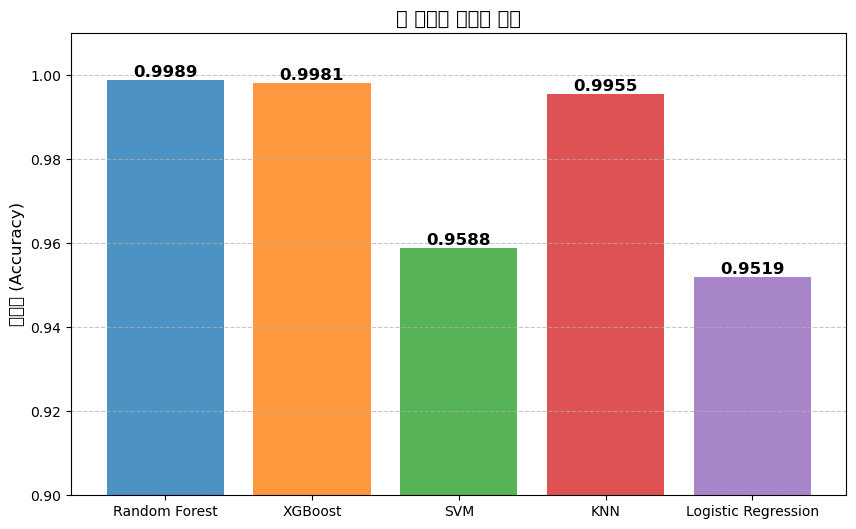

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# 모델과 정확도 데이터
models = ["Random Forest", "XGBoost", "SVM", "KNN", "Logistic Regression"]
accuracies = [0.9989, 0.9981, 0.9588, 0.9955, 0.9519]
times = [6.15, 0.55, 439.64, 2.83, 1.21]

# 색상 설정
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors, alpha=0.8)

# 정확도 값 표시
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{acc:.4f}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 그래프 제목 및 레이블
plt.title("📊 모델별 정확도 비교", fontsize=14, fontweight='bold')
plt.ylabel("정확도 (Accuracy)", fontsize=12)
plt.ylim(0.9, 1.01)  # Y축 범위 조정

# 그래프 출력
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

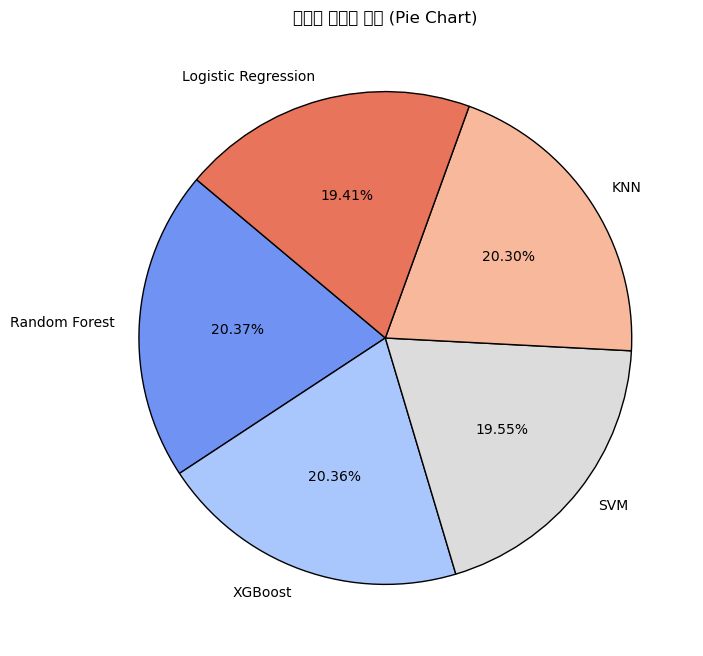

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

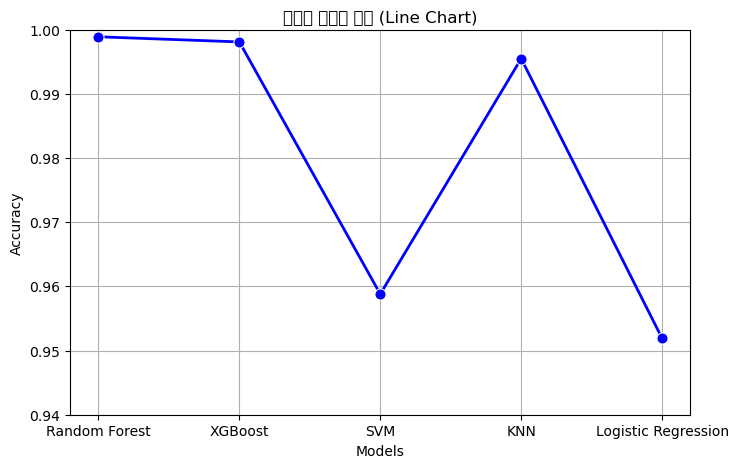

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

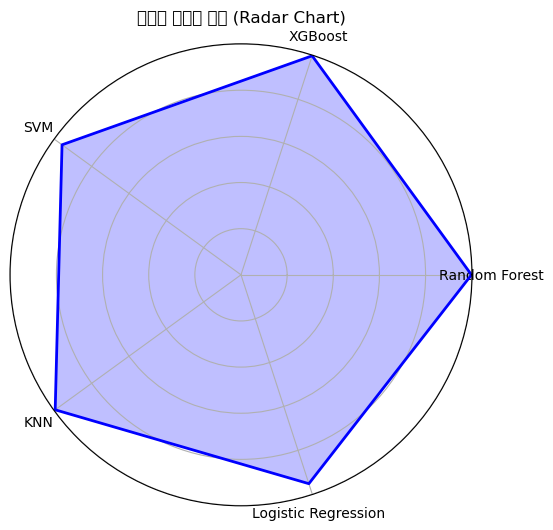

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모델과 정확도 데이터
models = ["Random Forest", "XGBoost", "SVM", "KNN", "Logistic Regression"]
accuracies = [0.9989, 0.9981, 0.9588, 0.9955, 0.9519]

# 원형 그래프 (Pie Chart)
plt.figure(figsize=(8, 8))
colors = sns.color_palette("coolwarm", len(models))
plt.pie(accuracies, labels=models, autopct='%1.2f%%', colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("모델별 정확도 비교 (Pie Chart)")
plt.show()

# 꺾은선 그래프 (Line Chart)
plt.figure(figsize=(8, 5))
sns.lineplot(x=models, y=accuracies, marker='o', linewidth=2, markersize=8, color='b')
plt.ylim(0.94, 1.00)
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.title("모델별 정확도 비교 (Line Chart)")
plt.grid(True)
plt.show()

# 레이더 차트 (Radar Chart)
labels=np.array(models)
stats=np.array(accuracies)

angles = np.linspace(0, 2 * np.pi, len(models), endpoint=False).tolist()
stats = np.concatenate((stats,[stats[0]]))  # 첫 번째 값 반복
angles += angles[:1]  # 첫 번째 각도 반복

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, stats, color='blue', alpha=0.25)
ax.plot(angles, stats, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title("모델별 정확도 비교 (Radar Chart)")
plt.show()
